In [1]:
import numpy as np
import sklearn as sk
import mglearn as mg
import matplotlib.pyplot as plt
%matplotlib inline

/home/lucifer/ed/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/lucifer/ed/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


w[0]: 0.393906  b: -0.031804


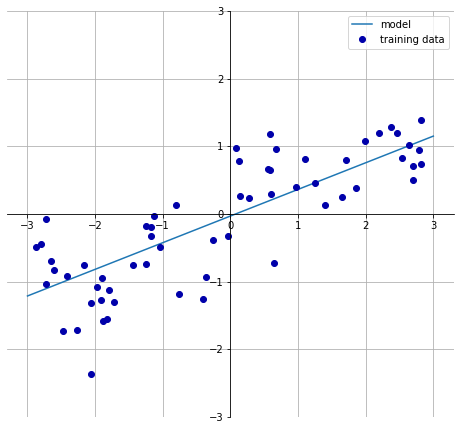

In [2]:
mg.plots.plot_linear_regression_wave()

### Linear Regression (aka Ordinary Least Square)

In [3]:
X, y = mg.datasets.make_wave(n_samples=60)
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(X, y, random_state = 42)

lr = sk.linear_model.LinearRegression()
lr.fit(Xtrain, ytrain)
print("Coeff: {}".format(lr.coef_))
print("Intercept: {:.5f}".format(lr.intercept_))
print("Training Set Score: {:.9f}".format(lr.score(Xtrain , ytrain)))
print("Testing Set Score: {:.9f}".format(lr.score(Xtest, ytest)))

Coeff: [0.39390555]
Intercept: -0.03180
Training Set Score: 0.670089032
Testing Set Score: 0.659336860


In [4]:
X, y = mg.datasets.load_extended_boston()
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(X, y, random_state = 42)
lr = sk.linear_model.LinearRegression()
lr.fit(Xtrain, ytrain)
print("Training Set Score: {:.3f}".format(lr.score(Xtrain, ytrain)))
print("Testing Set Score: {:.3f}".format(lr.score(Xtest, ytest)))

Training Set Score: 0.945
Testing Set Score: 0.776


### Ridge Regression

In [5]:
X, y = mg.datasets.load_extended_boston()
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(X, y, random_state=42)
rr = sk.linear_model.Ridge()
rr.fit(Xtrain, ytrain)
print("Training Set Score: {:.3f}".format(rr.score(Xtrain, ytrain)))
print("Testing Set Score: {:.3f}".format(rr.score(Xtest, ytest)))

Training Set Score: 0.870
Testing Set Score: 0.815


In [6]:
rr10 = sk.linear_model.Ridge(alpha = 10)
rr10.fit(Xtrain, ytrain)
print("Training Set Score: {:.3f}".format(rr10.score(Xtrain, ytrain)))
print("Testing Set Score: {:.3f}".format(rr10.score(Xtest, ytest)))

rr01 = sk.linear_model.Ridge(alpha = .1)
rr01.fit(Xtrain, ytrain)
print("Training Set Score: {:.3f}".format(rr01.score(Xtrain, ytrain)))
print("Testing Set Score: {:.3f}".format(rr01.score(Xtest, ytest)))

Training Set Score: 0.767
Testing Set Score: 0.728
Training Set Score: 0.917
Testing Set Score: 0.825


### Lasso Regression

In [7]:
lasso = sk.linear_model.Lasso()
lasso.fit(Xtrain, ytrain)
print("Training Set Score: {:.3f}".format(lasso.score(Xtrain, ytrain)))
print("Testing Set Score: {:.3f}".format(lasso.score(Xtest, ytest)))
print("Number of Features used: {}".format(np.sum(lasso.coef_ != 0)))
print('-'*63)
lasso001 = sk.linear_model.Lasso(alpha=0.01, max_iter = 100000)
lasso001.fit(Xtrain, ytrain)
print("Training Set Score: {:.3f}".format(lasso001.score(Xtrain, ytrain)))
print("Testing Set Score: {:.3f}".format(lasso001.score(Xtest, ytest)))
print("Number of Features used: {}".format(np.sum(lasso001.coef_ != 0)))
print('-'*63)
lasso000001 = sk.linear_model.Lasso(alpha=0.0001, max_iter = 100000)
lasso000001.fit(Xtrain, ytrain)
print("Training Set Score: {:.3f}".format(lasso000001.score(Xtrain, ytrain)))
print("Testing Set Score: {:.3f}".format(lasso000001.score(Xtest, ytest)))
print("Number of Features used: {}".format(np.sum(lasso000001.coef_ != 0)))

Training Set Score: 0.268
Testing Set Score: 0.260
Number of Features used: 3
---------------------------------------------------------------
Training Set Score: 0.886
Testing Set Score: 0.804
Number of Features used: 34
---------------------------------------------------------------
Training Set Score: 0.944
Testing Set Score: 0.808
Number of Features used: 95


### Logistic Regression

/home/lucifer/ed/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/lucifer/ed/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


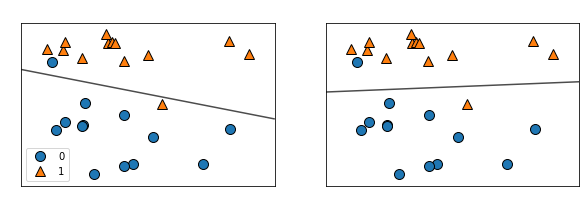

In [8]:
X, y = mg.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([sk.linear_model.LogisticRegression(), sk.svm.LinearSVC()], axes):
    clf = model.fit(X, y)
    mg.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mg.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__), color="w")
    ax.set_xlabel("Feature 0", color="w")
    ax.set_ylabel("Feature 1", color="w")
axes[0].legend(loc="best")

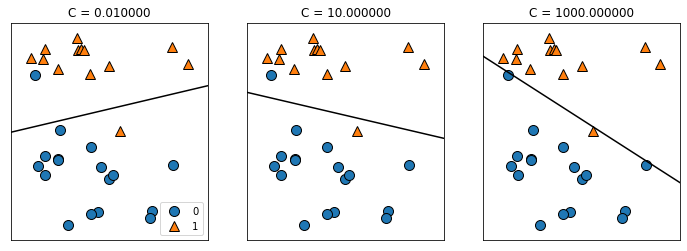

In [9]:
mg.plots.plot_linear_svc_regularization()

In [10]:
cancer_dataset = sk.datasets.load_breast_cancer()
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(cancer_dataset.data, cancer_dataset.target, stratify=cancer_dataset.target, random_state=42)
logreg = sk.linear_model.LogisticRegression()
logreg.fit(Xtrain, ytrain)
print("Training Score: {:.3f}".format(logreg.score(Xtrain, ytrain)))
print("Testing Score: {:.3f}".format(logreg.score(Xtest, ytest)))

logreg100 = sk.linear_model.LogisticRegression(C=100)
logreg100.fit(Xtrain, ytrain)
print("Training Score: {:.3f}".format(logreg100.score(Xtrain, ytrain)))
print("Testing Score: {:.3f}".format(logreg100.score(Xtest, ytest)))


logreg001 = sk.linear_model.LogisticRegression(C=0.01)
logreg001.fit(Xtrain, ytrain)
print("Training Score: {:.3f}".format(logreg001.score(Xtrain, ytrain)))
print("Testing Score: {:.3f}".format(logreg001.score(Xtest, ytest)))


Training Score: 0.951
Testing Score: 0.951
Training Score: 0.946
Testing Score: 0.958
Training Score: 0.937
Testing Score: 0.930


/home/lucifer/ed/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lucifer/ed/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

### Linear SVC

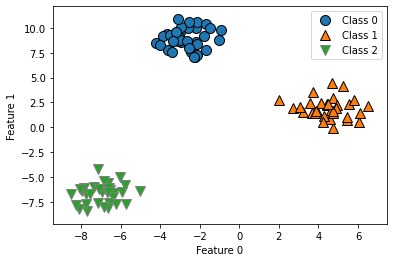

In [11]:
X, y = sk.datasets.make_blobs(random_state=42)
mg.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [13]:
linearsvc = sk.svm.LinearSVC()
linearsvc.fit(X, y)
print("Coefficient shape: {}".format(linearsvc.coef_.shape))
print("Intercept shape: {}".format(linearsvc.intercept_.shape))

Coefficient shape: (3, 2)
Intercept shape: (3,)


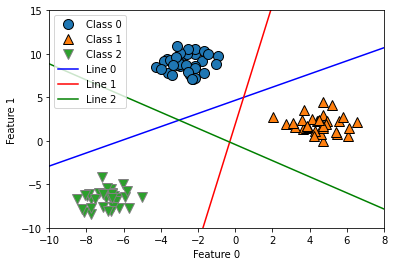

In [16]:
mg.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linearsvc.coef_, linearsvc.intercept_, ['b', 'r', 'g']):
    plt.plot(line , -(line * coef[0] + intercept)/coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line 0", "Line 1", "Line 2"], loc="best")

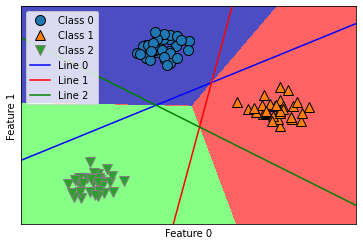

In [18]:
mg.plots.plot_2d_classification(linearsvc, X, fill=True, alpha=.7)
mg.discrete_scatter(X[:, 0], X[:, 1], y)
for coef, intercept, color in zip(linearsvc.coef_, linearsvc.intercept_, ['b', 'r', 'g']):
    plt.plot(line , -(line * coef[0] + intercept)/coef[1], c = color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line 0", "Line 1", "Line 2"], loc="best")